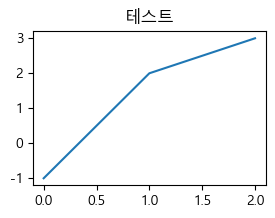

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------------------
# 한글 폰트 설정
# ---------------------------------------

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

pd.Series([-1,2,3]).plot(title='테스트', figsize=(3,2))

# ---------------------------------------
# 그래프 전역 크기 설정
# ---------------------------------------
plt.rc('figure', figsize=(12,5))

pass


## 데이터 수집

-  계절별 산불현황 데이터
    - https://kosis.kr/statHtml/statHtml.do?sso=ok&returnurl=https%3A%2F%2Fkosis.kr%3A443%2FstatHtml%2FstatHtml.do%3Fconn_path%3DMT_ZTITLE%26list_id%3DC_12%26obj_var_id%3D%26seqNo%3D%26tblId%3DTX_13625_A002%26vw_cd%3DMT_ZTITLE%26itm_id%3D%26language%3Dkor%26lang_mode%3Dko%26orgId%3D136%26


## 계절별 산불 발생 현황

In [62]:
# -----------------------------
# 계절별 컬러
# -----------------------------

season_color_set = {
    '봄(3~5월)': '#F28CB1',   
    '여름(6~8월)': '#4EA8DE',  
    '가을(9~11월)': '#D2691E', 
    '겨울(12~2월)': '#6C757D'  
}

In [63]:
# -----------------------------
# 데이터프레임 생성
# -----------------------------

data_file = 'data/산불데이터/계절별_산불발생_현황_20250406140813.csv'
df_season = pd.read_csv(data_file)

In [64]:
# -----------------------------
# 인덱스라벨 지정
#   - 시점
# -----------------------------

df_season = df_season.set_index('시점')
df_season.head()

,기간별,합계,봄(3~5월),여름(6~8월),가을(9~11월),겨울(12~2월)
시점,,,,,,
1997,금년,524,310,7,79,128
1998,금년,265,171,1,14,79
1999,금년,315,197,5,14,99
2000,금년,729,503,17,30,179
2001,금년,785,625,28,56,76


In [65]:
df_season.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28 entries, 1997 to 2024
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   기간별        28 non-null     object
 1   합계         28 non-null     int64 
 2   봄(3~5월)    28 non-null     int64 
 3   여름(6~8월)   28 non-null     int64 
 4   가을(9~11월)  28 non-null     int64 
 5   겨울(12~2월)  28 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.5+ KB


In [66]:
# -----------------------------
# 계절별 평균 산불 발생 건수 
# -----------------------------

season_mean = df_season.iloc[:,2:].mean()
season_mean

봄(3~5월)      285.785714
여름(6~8월)      28.107143
가을(9~11월)     41.142857
겨울(12~2월)    121.000000
dtype: float64

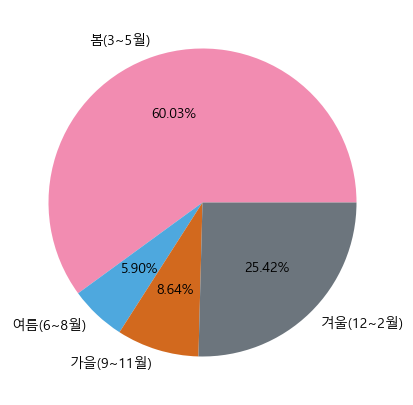

In [67]:
# -----------------------------
# 계절별 평균 산불 발생 건수 시각화
# -----------------------------

colors = [season_color_set[label] for label in season_mean.index]

plt.pie(season_mean.values,
        labels=season_mean.index,
        autopct='%.2f%%',
        colors = colors)

pass

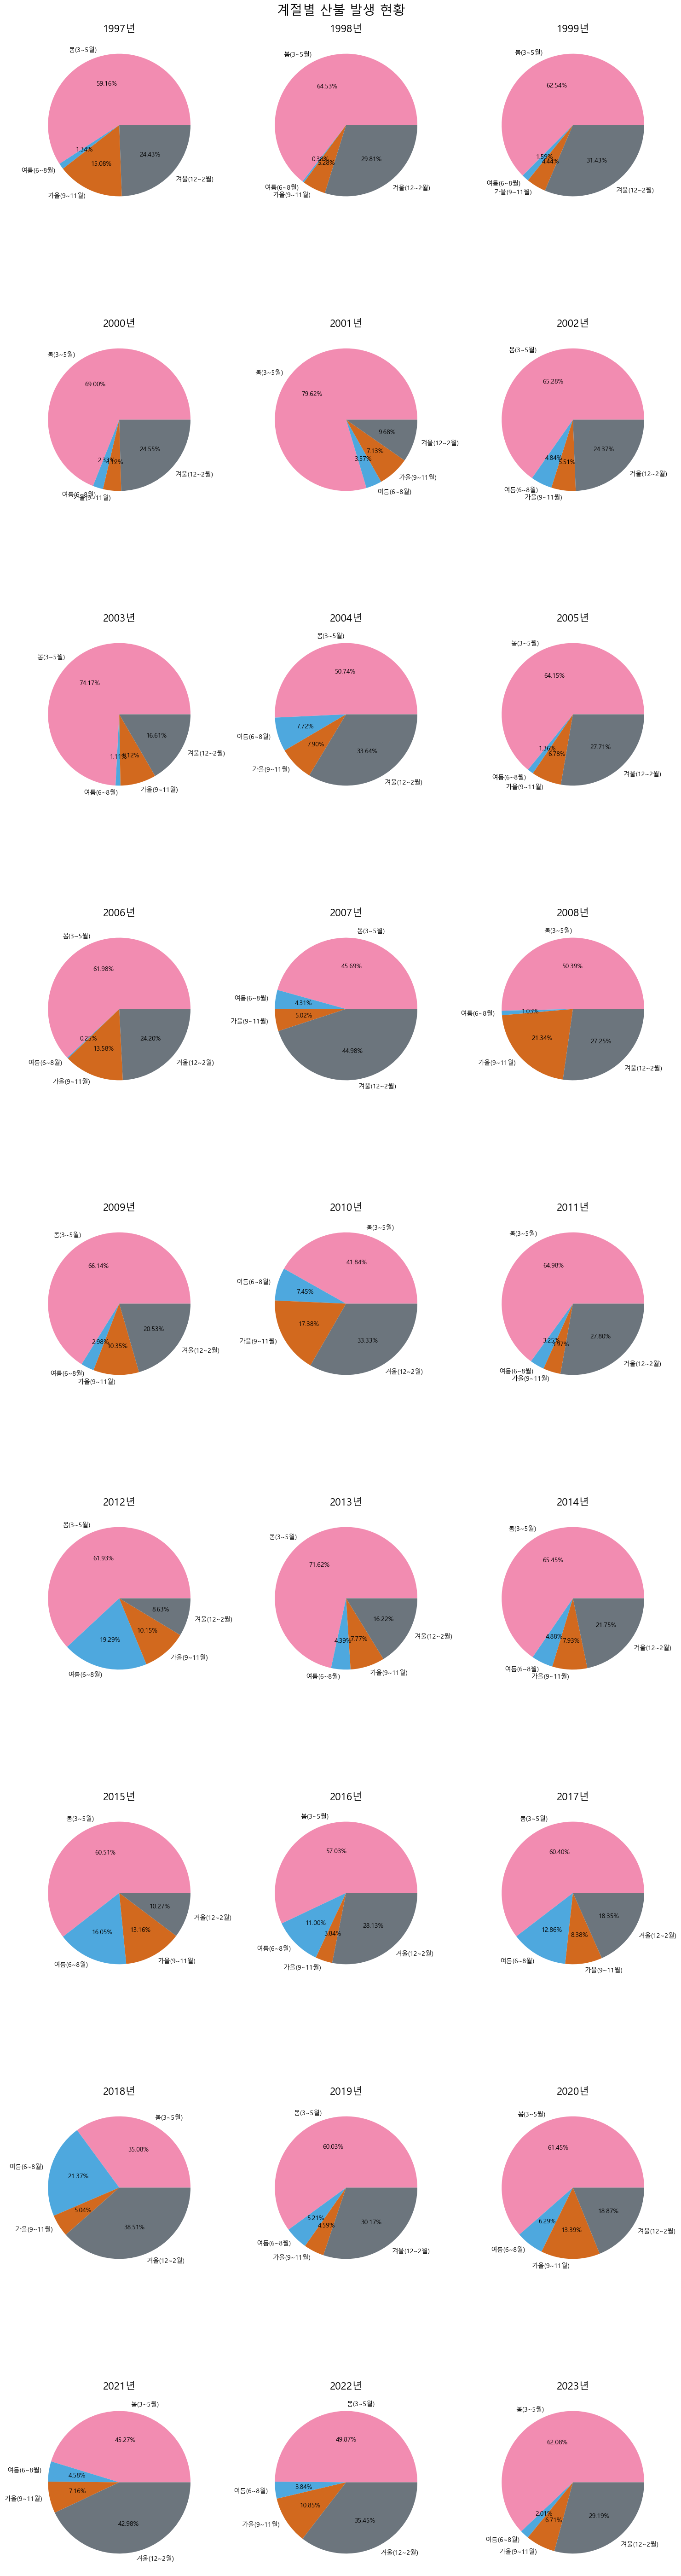

In [68]:
# -----------------------------
# 연도별 시각화
# -----------------------------

fig, axes = plt.subplots(10,3,
             figsize=(15,65))

axes_flat = axes.flatten()

for i, year in enumerate(df_season.index):
    data = df_season.loc[year,'봄(3~5월)':]
    colors = [season_color_set[label] for label in data.index]
    axes_flat[i].pie(data,
                     labels = data.index,
                     autopct='%.2f%%',
                     colors = colors)
    axes_flat[i].set_title(f'{year}년', fontsize=16)


for j in range(i, len(axes_flat)):
    fig.delaxes(axes_flat[j])


fig.suptitle("계절별 산불 발생 현황", fontsize=20)
fig.tight_layout()